In [2]:
import numpy as np
# from google.colab import drive

# # --- 1. Mount Google Drive ---
# print("Mounting Google Drive...")
# drive.mount('/content/drive')
# print("Drive mounted successfully.")

# --- 2. Define File Path ---
# This path should point to the file created by the previous script.
source_path = './data/decodinglab/placedata_formatted.npy'

# --- 3. Load the Data ---
print(f"\nAttempting to load data from: {source_path}")

try:
    # Load the .npy file.
    # allow_pickle=True is necessary for loading the dictionary object.
    # .item() extracts the dictionary from the NumPy array wrapper.
    loaded_data = np.load(source_path, allow_pickle=True).item()
    print("File loaded successfully.")

    # --- 4. Unpack All Variables into Memory ---
    # This section explicitly assigns each key from the loaded dictionary
    # to its own variable in the script's environment.
    print("\nUnpacking variables...")

    # Original data
    LRtrain = loaded_data['LRtrain']
    LRtest = loaded_data['LRtest']
    RLtest = loaded_data['RLtest']
    LRtraintgt = loaded_data['LRtraintgt']
    LRtesttgt = loaded_data['LRtesttgt']
    RLtesttgt = loaded_data['RLtesttgt']

    # New index formats
    LRtraintgt_index = loaded_data['LRtraintgt_index']
    LRtesttgt_index = loaded_data['LRtesttgt_index']
    RLtesttgt_index = loaded_data['RLtesttgt_index']

    # New one-hot formats
    LRtraintgt_onehot = loaded_data['LRtraintgt_onehot']
    LRtesttgt_onehot = loaded_data['LRtesttgt_onehot']
    RLtesttgt_onehot = loaded_data['RLtesttgt_onehot']

    # New ordinal formats
    LRtraintgt_ordinal = loaded_data['LRtraintgt_ordinal']
    LRtesttgt_ordinal = loaded_data['LRtesttgt_ordinal']
    RLtesttgt_ordinal = loaded_data['RLtesttgt_ordinal']

    print("All 15 variables have been unpacked and are ready for use.")

    # --- 5. Report on Unpacked Variables ---
    print("\n" + "="*50)
    print("The following variables are now available in memory:")
    print("="*50)

    # Create a list of the variable names we just created
    all_vars = [
        'LRtrain', 'LRtest', 'RLtest',
        'LRtraintgt', 'LRtesttgt', 'RLtesttgt',
        'LRtraintgt_index', 'LRtesttgt_index', 'RLtesttgt_index',
        'LRtraintgt_onehot', 'LRtesttgt_onehot', 'RLtesttgt_onehot',
        'LRtraintgt_ordinal', 'LRtesttgt_ordinal', 'RLtesttgt_ordinal'
    ]

    # Loop through the list and print the shape of each variable
    for var_name in all_vars:
        var_data = locals()[var_name]
        print(f"  - Variable: {var_name:<20} | Shape: {var_data.shape}")

    print("="*50)


# --- Error Handling ---
except FileNotFoundError:
    print(f"\n[ERROR] File Not Found: The file could not be found at '{source_path}'.")
    print("Please ensure that 'placedata_formatted.npy' was created successfully and exists in your 'My Drive'.")

except KeyError as e:
    print(f"\n[ERROR] Missing Data: The file was loaded, but a required variable key was not found: {e}.")
    print("Please check the script that created 'placedata_formatted.npy' to ensure all 15 variables were saved correctly.")

except Exception as e:
    print(f"\n[ERROR] An unexpected error occurred: {e}")


Attempting to load data from: ./data/decodinglab/placedata_formatted.npy

[ERROR] File Not Found: The file could not be found at './data/decodinglab/placedata_formatted.npy'.
Please ensure that 'placedata_formatted.npy' was created successfully and exists in your 'My Drive'.


Data reshaped for scikit-learn:
  X_train shape: (916, 359)
  y_train shape: (916,)
  X_test shape:  (904, 359)
  y_test shape:  (904,)

--- Defining and Training SVM Model ---
--- Training Finished ---

--- Starting Validation on LRtest data ---

Model Performance Report
Accuracy: 51.44 %

--- Error on Integer Labels (0-22) ---
Mean Squared Distance Error: 2.8396
Mean Absolute Distance Error: 0.9325

--- Error on Normalized Labels (0-1) ---
Normalized Mean Squared Error: 0.0059
Normalized Mean Absolute Error: 0.0424


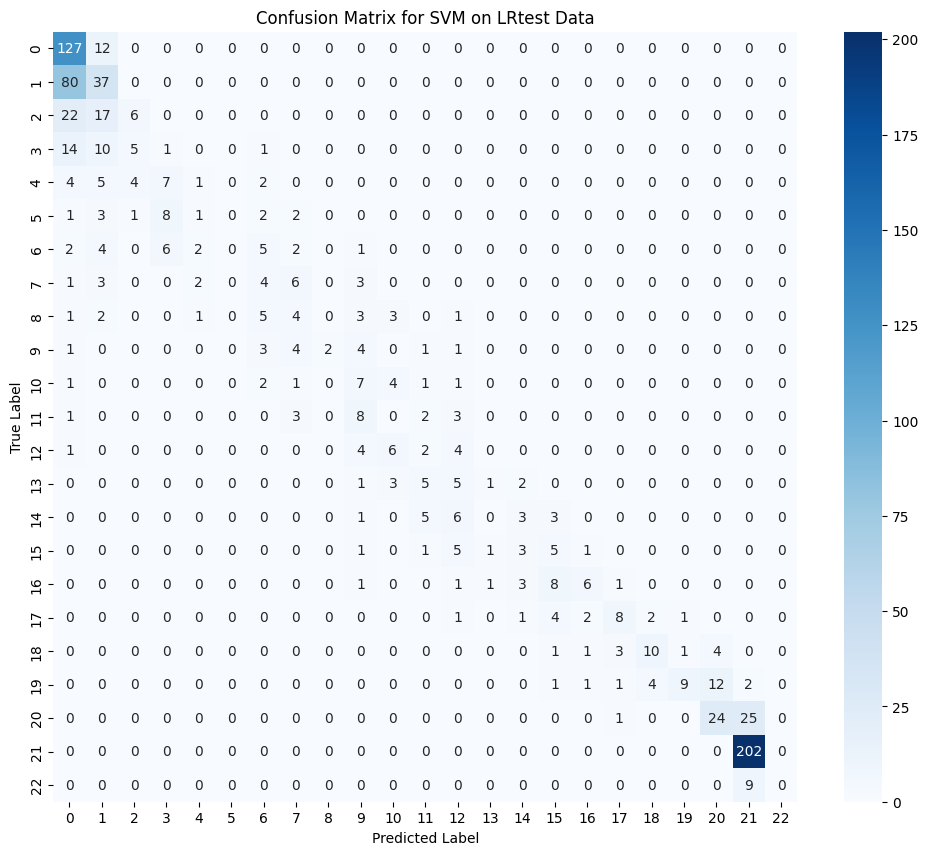

In [25]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# --- PREREQUISITE: Assumed variables in memory ---
# This script assumes you have already run the 'unpacker_data_loader'
# cell and have the following variables available:
#
#   LRtrain:            Training data features
#   LRtest:             Testing data features
#   LRtraintgt_index:   Training data integer labels (0-22)
#   LRtesttgt_index:    Testing data integer labels (0-22)
# ----------------------------------------------------

try:
    # --- 1. Data Preprocessing ---
    # Scikit-learn expects data in the format (n_samples, n_features).
    # Our current data is (n_features, n_samples), so we need to transpose it.
    X_train = LRtrain.T
    X_test = LRtest.T

    # The target vectors (y) are already in the correct 1D format.
    y_train = LRtraintgt_index
    y_test = LRtesttgt_index

    print("Data reshaped for scikit-learn:")
    print(f"  X_train shape: {X_train.shape}")
    print(f"  y_train shape: {y_train.shape}")
    print(f"  X_test shape:  {X_test.shape}")
    print(f"  y_test shape:  {y_test.shape}")

    # --- 2. Define and Train the SVM Model ---
    print("\n--- Defining and Training SVM Model ---")

    # Instantiate the Support Vector Classifier.
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)

    # Train the SVM model using the training data.
    svm_model.fit(X_train, y_train)

    print("--- Training Finished ---")

    # --- 3. Validate the Classifier ---
    print("\n--- Starting Validation on LRtest data ---")

    # Use the trained model to make predictions on the unseen test data.
    predicted_labels = svm_model.predict(X_test)

    # --- 4. Calculate and Report Metrics ---
    num_classes = len(np.unique(y_train))
    max_label_value = num_classes - 1

    # Normalize labels for 0-1 range metrics
    y_test_normalized = y_test / max_label_value
    predicted_labels_normalized = predicted_labels / max_label_value

    print("\n" + "="*50)
    print("Model Performance Report")
    print("="*50)

    # Accuracy
    accuracy = accuracy_score(y_test, predicted_labels)
    print(f'Accuracy: {100 * accuracy:.2f} %')

    print("\n--- Error on Integer Labels (0-22) ---")
    # Mean Squared Distance Error
    msd_error = mean_squared_error(y_test, predicted_labels)
    print(f'Mean Squared Distance Error: {msd_error:.4f}')

    # Mean Absolute Distance Error
    mae_error = mean_absolute_error(y_test, predicted_labels)
    print(f'Mean Absolute Distance Error: {mae_error:.4f}')

    print("\n--- Error on Normalized Labels (0-1) ---")
    # Normalized Mean Squared Distance Error
    normalized_msd_error = mean_squared_error(y_test_normalized, predicted_labels_normalized)
    print(f'Normalized Mean Squared Error: {normalized_msd_error:.4f}')

    # Normalized Mean Absolute Distance Error
    normalized_mae_error = mean_absolute_error(y_test_normalized, predicted_labels_normalized)
    print(f'Normalized Mean Absolute Error: {normalized_mae_error:.4f}')
    print("="*50)


    # --- 5. Generate and plot the confusion matrix ---
    cm = confusion_matrix(y_test, predicted_labels, labels=range(num_classes))
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(num_classes),
                yticklabels=range(num_classes))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for SVM on LRtest Data')
    plt.show()

# --- Error Handling ---
except NameError as e:
    print(f"\n[ERROR] A required variable was not found in memory: {e}.")
    print("Please ensure you have run the data loading cell before this one.")

except Exception as e:
    print(f"\n[ERROR] An unexpected error occurred: {e}")